In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pip install textstat


     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 3.0MB 8.5MB/s 


In [ ]:
import textstat


In [ ]:
text=pd.read_csv('/content/drive/My Drive/Amazon_Dataset/1429_1.csv')
text.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(34660, 21)

In [ ]:
text.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [ ]:
textdata = text[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
textdata.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


In [ ]:
#Drop null values
textdata.dropna(inplace=True)
textdata.isna().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [ ]:
textcopy=textdata.copy()

In [ ]:
#Filter products based on number of reviews
textdata=textdata.groupby(['name']).filter(lambda x: len(x)>300).reset_index(drop=True)
print('Number of products matching the criteria is ',len(textdata['name'].unique()))

Number of products matching the criteria is  10


In [ ]:
#convert datatype boolean and float to int
textdata['reviews.doRecommend']=textdata['reviews.doRecommend'].astype(int)
textdata['reviews.numHelpful']=textdata['reviews.numHelpful'].astype(int)

In [ ]:
#Cleaning Text data. There are 10 unique product names. Remove unwanted characters from the names.

textdata['name'].unique()
textdata['name']=textdata['name'].apply(lambda x: x.split(',,,')[0])

In [ ]:
#Explore and clean the review text
for text in enumerate(textdata['reviews.text'][20:30]):
  print('Review:\n',text)

Review:
 (0, 'Excellent tablet with nice screen. I wish Amazon would pre install the play store, this would have been perfect.')
Review:
 (1, 'Preloaded with the reading app from Kindle but expandable with other apps. Perfect for travel. Carry your library, games and productivity apps in a small footprint.')
Review:
 (2, 'Very happy with this product and easy to use..picture is clear, takes great pictures..')
Review:
 (3, 'My grandchildren are home schooled and utilize the tables for many learning apps! They LOVE using them as it makes them feel "so grown up"! The tablets are a great leaning tool and they are receiving many benefits from them!')
Review:
 (4, 'Great size, easy to carry for traveling. Need to spend more time Looking into apps for contact manegement, interactive calenders and most important, music storage and use.')
Review:
 (5, 'I purchased this when my last tablet died. It meets all basic needs and the price was great.')
Review:
 (6, 'Perfect for downloading and reading

In [ ]:
# While developing NLP models capital and lowercase letters are treated differently so its required to convert all words to lowercase, as few words are in capitals in the review text.

textdata['reviews.text']=textdata['reviews.text'].apply(lambda x: x.lower())

In [ ]:
# Eliminate digits in the text using regular expressions

textdata['reviews.text']=textdata['reviews.text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
#Eliminate punctuaitons

textdata['reviews.text']=textdata['reviews.text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
# use spacy module
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# stopwords removal and lemmatization
textdata['reviews.text']=textdata['reviews.text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

textdata=textdata[['name','reviews.text']].groupby(by='name').agg(lambda x:' '.join(x))
textdata.head()

,reviews.text
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint child love use like abi...
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,love buy buy parent easy start walk right inst...
Amazon Fire Tv,echo learn everyday use daily use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow wish investigate little j...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,good value money hand work perfectly purchase ...


In [ ]:
#Generate document term matrix to find most occuring terms in the reviews

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(textdata['reviews.text'])
text_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
text_dtm.index=textdata.index
text_dtm.head()

,aa,aaa,aamazon,abandon,abattery,abc,abcmouse,abcmousecom,abcs,abd,ability,abilty,abit,abke,able,abnormal,abode,abook,abound,abount,abouti,aboutif,abroad,abruptly,absence,absofbe,absoluitely,absolute,absolutely,absolutly,absorb,abt,abundance,abundant,abuse,ac,academic,acc,acce,accedently,...,yougo,youit,youkathleen,younameit,young,younger,youngest,youngin,youngster,yourbedmate,youreyesprobably,yous,youse,youshe,youso,youth,youtube,youtubeand,youtubegmail,youtubekid,youtubenetflix,youtubepandora,youversion,youwhat,yr,yrold,yrs,yuh,yup,zeepad,zeppelin,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zwave
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,0,0,0,24,0,1,0,77,0,0,0,0,1,0,0,0,0,0,0,0,3,33,0,0,0,0,0,2,0,0,1,1,0,...,0,0,0,0,20,0,0,0,0,0,1,0,0,0,0,1,37,0,0,0,0,0,0,0,23,0,3,0,0,0,0,4,0,1,0,0,0,0,0,0
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,0,0,0,0,0,0,0,0,0,0,4,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Amazon Fire Tv,0,1,1,0,0,0,0,0,0,0,37,0,0,0,121,0,0,0,0,0,0,0,0,1,1,0,0,1,49,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,0,1,0,2,0,0,0,0,56,0,0,0,131,1,0,1,1,0,0,0,0,0,0,0,0,1,69,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,15,0,0,0,2,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,10,0,5,0,0,0,0,4,0,0,0,0,2,0,2,0
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,0,0,0,0,0,1,0,0,0,0,6,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,8,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,9,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def wordcloud(data,title):
  wc = WordCloud(width=600, height=530, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
text_dtm=text_dtm.transpose()

for index,product in enumerate(text_dtm.columns):
  wordcloud(text_dtm[product].sort_values(ascending=False),product)
 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Polarity in sentiment analysis refers to identifying sentiment orientation (positive, neutral, and negative) in written or spoken language.

textdata['emotion']=textdata['reviews.text'].apply(lambda x:TextBlob(x).sentiment.polarity)


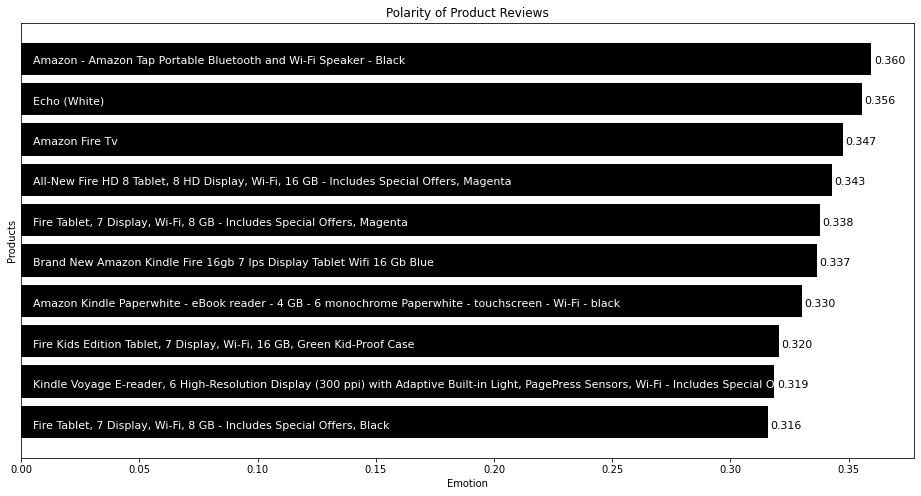

In [ ]:
product_polarity=pd.DataFrame(textdata.groupby('name')['emotion'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Emotion')
plt.ylabel('Products')
plt.title('Polarity of Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity.index)),product_polarity['emotion'],color='black')


for bar,product in zip(polarity_graph,product_polarity.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

for bar,polarity in zip(polarity_graph,product_polarity['emotion']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [ ]:
textcopy['reviews.doRecommend']=textcopy['reviews.doRecommend'].astype(int)
textcopy['reviews.numHelpful']=textcopy['reviews.numHelpful'].astype(int)


In [ ]:
#using textstat package

textcopy['reading_time']=textcopy['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews is',textcopy[textcopy['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews is',textcopy[textcopy['reviews.numHelpful']<=1]['reading_time'].mean())

Reading Time of upvoted reviews is 3.696822519083974
Reading Time of not upvoted reviews is 1.8005997496301547
